# Hierarchical Clustering Notebook

#### *Author: Kunyu He*
#### *University of Chicago, CAPP'20*

In [16]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from collections import Counter

### Load Data

In [17]:
mall = pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Cleaning

In [18]:
mall.isnull().sum(axis=0)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No value missing.

### Feature Selection

In [19]:
X = mall.iloc[:, 3:5].values.astype(float)
X.shape

(200, 2)

### Model Training

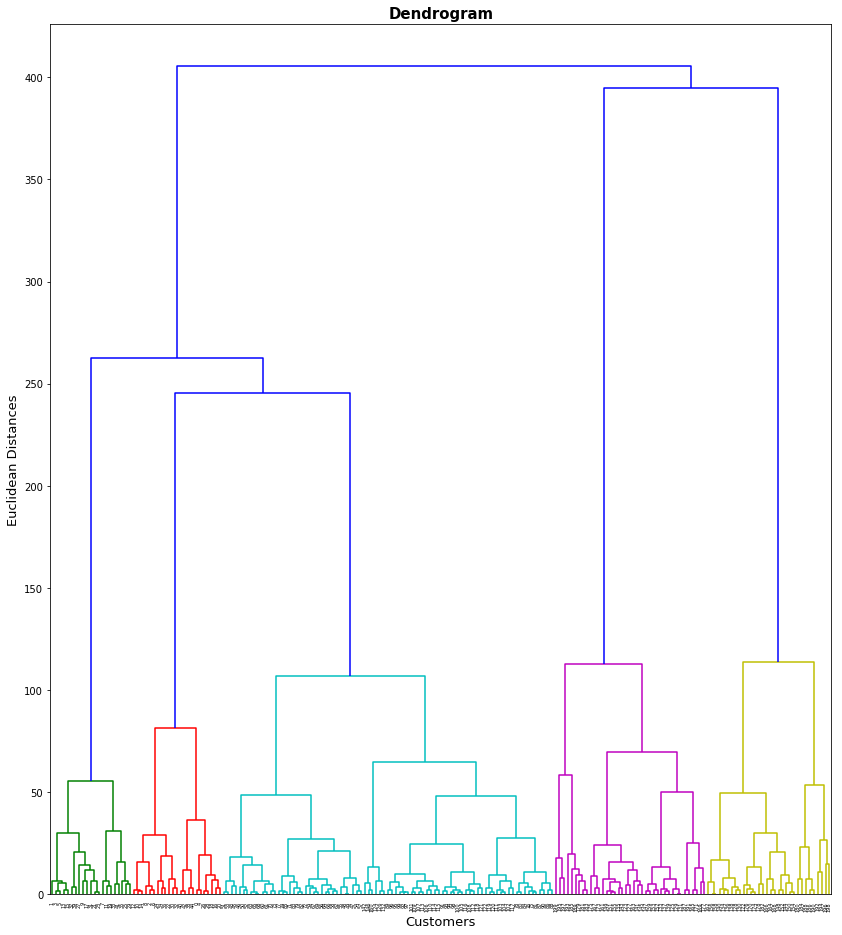

In [21]:
fig = plt.figure(figsize=[14, 16])

dendro = sch.dendrogram(sch.linkage(X, method="ward"), color_threshold=150)
plt.title("Dendrogram", fontdict={'fontsize': 15, 'fontweight': "bold"})
plt.xlabel("Customers", fontsize=13)
plt.ylabel("Euclidean Distances", fontsize=13)
plt.show()

In [24]:
hc = AgglomerativeClustering(n_clusters=5, linkage="ward", affinity="euclidean")
hc_pred = hc.fit_predict(X)
Counter(hc_pred)

Counter({4: 23, 3: 21, 1: 85, 2: 39, 0: 32})

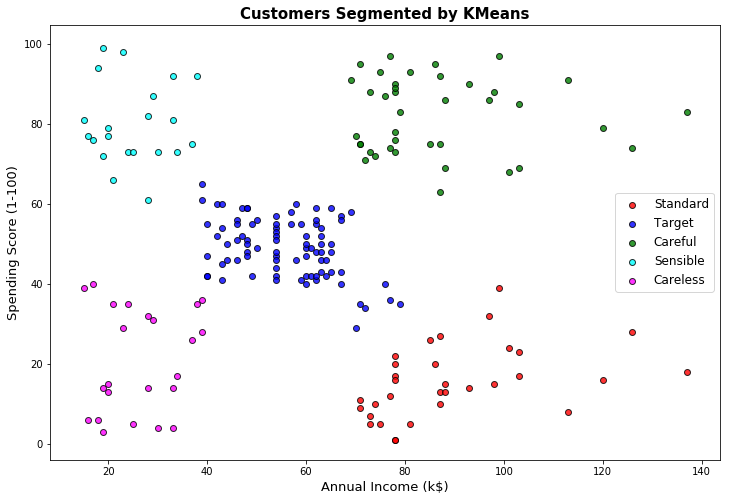

In [25]:
fig = plt.figure(figsize=[12, 8])

plt.scatter(X[hc_pred == 0, 0], X[hc_pred == 0, 1], c="red", alpha=0.8,
            edgecolors="black", label="Standard")
plt.scatter(X[hc_pred == 1, 0], X[hc_pred == 1, 1], c="blue", alpha=0.8,
            edgecolors="black", label="")
plt.scatter(X[hc_pred == 2, 0], X[hc_pred == 2, 1], c="green", alpha=0.8,
            edgecolors="black", label="Target")
plt.scatter(X[hc_pred == 3, 0], X[hc_pred == 3, 1], c="cyan", alpha=0.8,
            edgecolors="black", label="Careless")
plt.scatter(X[hc_pred == 4, 0], X[hc_pred == 4, 1], c="magenta", alpha=0.8,
            edgecolors="black", label="Sensible")

plt.title("Customers Segmented by KMeans",
          fontdict={'fontsize': 15, 'fontweight': "bold"})
plt.xlabel("Annual Income (k$)", fontsize=13)
plt.ylabel("Spending Score (1-100)", fontsize=13)
plt.legend(fontsize=12)

plt.show()